## Seaborn

### What are the most popular stations in the city? 
### What are the busiest months and is there a weather component at play?
### What are the most popular trips between stations? 
### Are the existing stations evenly distributed?


The first question - “What are the most popular stations in the city?” - has an easy answer - we simply need a list of the 10 or 20 most popular start stations in the city. As this variable is a categorical one, a **bar chart** would suit our purposes best. A bar chart is one of the most common forms of visualizations because it’s very straightforward to interpret from anyone regardless of their background. 

Onto the second question - regarding when the most trips are taken and how this is connected to weather - we’d need a yearly overview of the trips month by month. Time series are best plotted on a **line chart**, hence we could plot the sum of the bike trips for each month as one line and combine it with the average temperature monthly as a second line on the plot. This will also show us whether there’s a relationship between temperature and bike usage. This is important because right now, the business strategy development isn’t clear whether the demand problem is a seasonal one or not. 


In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [7]:
%%capture
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('Data/output/newyork_data.csv')

In [9]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

(array([0, 1]), [Text(0, 0, 'member'), Text(1, 0, 'casual')])

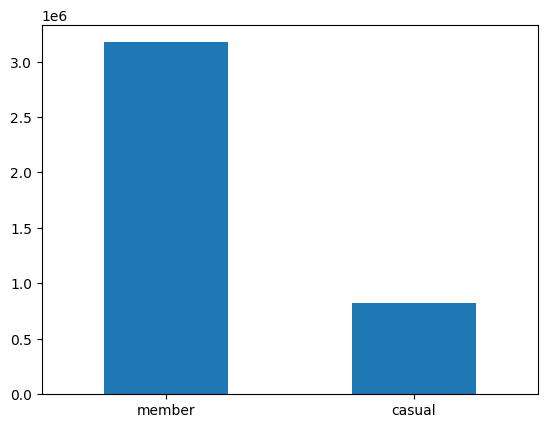

In [10]:
df['member_casual'].value_counts().plot(kind = 'bar')
# Set x-axis labels with rotation 0
plt.xticks(rotation=0)

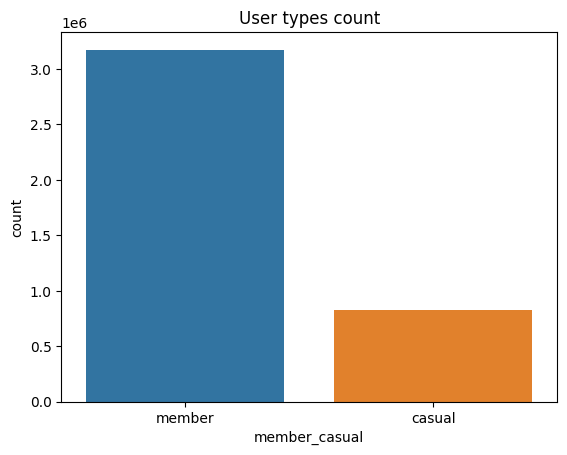

In [11]:
sns.countplot(data = df, x = 'member_casual')
plt.title("User types count")
plt.show()

### Types of plots

In [13]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

## Types of seaborn visualizations

#### Bar Chart

In [16]:
df['value'] = 1

In [17]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [18]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,3096
1,1 Ave & E 16 St,9959
2,1 Ave & E 18 St,9371
3,1 Ave & E 30 St,6263
4,1 Ave & E 39 St,7304
...,...,...
1724,Wyckoff Av & Stanhope St,2502
1725,Wyckoff Ave & Gates Ave,2340
1726,Wyckoff St & Nevins St,1482
1727,Wythe Ave & Metropolitan Ave,9387


In [19]:
top20 = df_t.nlargest(20, 'value')

In [20]:
top20

,start_station_name,value
8,1 Ave & E 68 St,16503
1557,W 21 St & 6 Ave,16479
490,Broadway & W 58 St,16098
284,6 Ave & W 33 St,13721
1687,West St & Chambers St,13297
458,Broadway & E 21 St,13069
456,Broadway & E 14 St,13044
777,E 33 St & 1 Ave,13043
480,Broadway & W 25 St,12915
1573,W 31 St & 7 Ave,12771


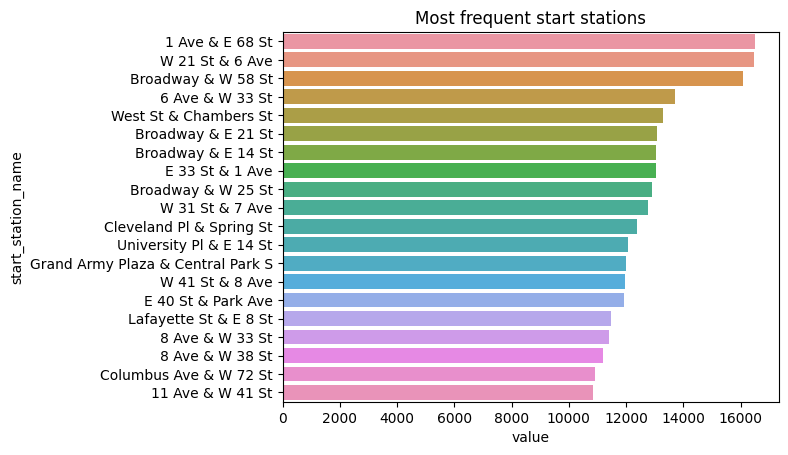

In [21]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

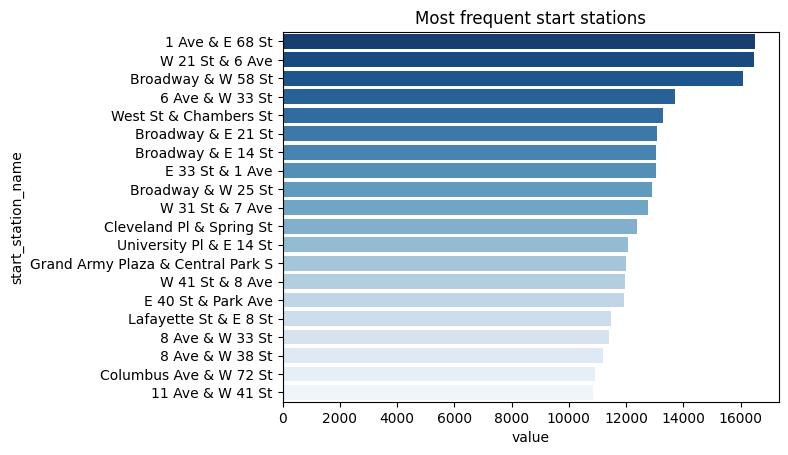

In [22]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("Blues_r"))
plt.title("Most frequent start stations")
plt.show()

### Line Plot 

In [24]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [25]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [26]:
df_group.head()

,date,ride_id
0,2021-01-30,1
1,2021-02-15,1
2,2021-08-16,1
3,2021-12-08,1
4,2021-12-19,1


In [27]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag')
print(df['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

both          4000000
left_only           0
right_only          0
Name: merge_flag, dtype: int64
Shape of January 1st is (0, 19)
Shape of January 2nd is (0, 19)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')


In [28]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')

In [29]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,_merge,value,bike_rides_daily,merge_flag
date,,,,,,,,,,,,,,,,,,
2022-02-28,70F3BA79664016C1,classic_bike,2022-02-28 09:22:49.821,2022-02-28 09:28:55.174,9 Ave & W 18 St,6190.08,Greenwich Ave & Charles St,5914.08,40.743174,-74.003664,40.735238,-74.000271,member,0.8,both,1,37930,both
2022-02-28,A17A13BC93E70054,classic_bike,2022-02-28 15:54:32.180,2022-02-28 15:58:19.524,McGuinness Blvd & Eagle St,5977.01,Greenpoint Ave & Manhattan Ave,5785.05,40.735550,-73.952840,40.730260,-73.953940,member,0.8,both,1,37930,both
2022-02-28,A40EA69F1AAAF8F1,classic_bike,2022-02-28 17:18:11.965,2022-02-28 17:39:10.532,W 42 St & 6 Ave,6517.08,Central Park West & W 76 St,7253.04,40.754920,-73.984550,40.778968,-73.973747,member,0.8,both,1,37930,both
2022-02-28,8181BFC7CD2D0D29,classic_bike,2022-02-28 23:20:15.894,2022-02-28 23:26:45.175,W 18 St & 6 Ave,6064.08,Lexington Ave & E 26 St,6089.08,40.739713,-73.994564,40.741459,-73.983293,member,0.8,both,1,37930,both
2022-02-28,9264124038B95E9A,classic_bike,2022-02-28 12:36:09.524,2022-02-28 12:58:10.084,E 4 St & 2 Ave,5593.04,William St & Pine St,5065.12,40.726281,-73.989780,40.707179,-74.008873,member,0.8,both,1,37930,both


In [30]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')

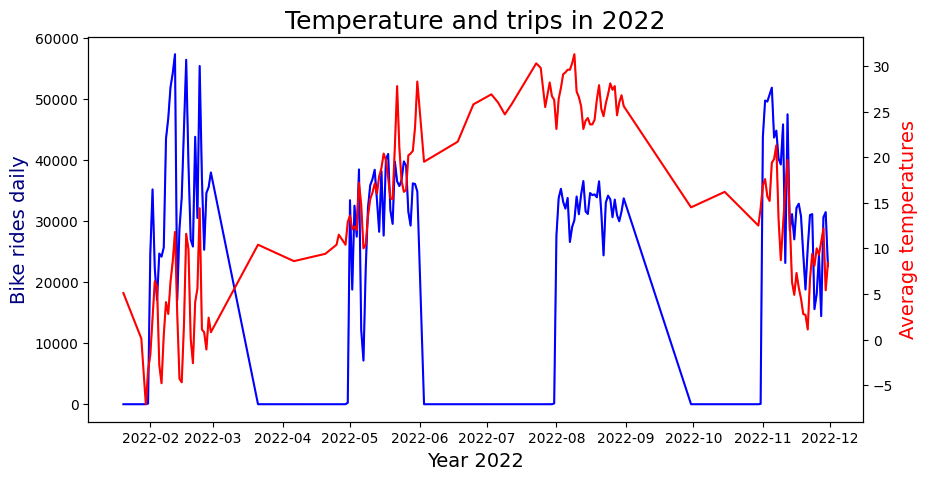

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'df_temp' has a datetime index or a date column
df_temp = df_temp[df_temp.index >= "2022-01-01"]  # Filter data from 2022 onwards

fig, ax = plt.subplots(figsize=(10, 5))

# Plot bike rides
sns.lineplot(data=df_temp['bike_rides_daily'], color="b", ax=ax)
ax.set_xlabel("Year 2022", fontsize=14)
ax.set_ylabel("Bike rides daily", color="navy", fontsize=14)

# Second y-axis for temperature
ax2 = ax.twinx()
sns.lineplot(data=df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color="red", fontsize=14)

plt.title("Temperature and trips in 2022", fontsize=18)
plt.show()


### Box Plots

In [33]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
_merge                        object
value                          int64
bike_rides_daily               int64
merge_flag                  category
dtype: object

In [34]:
df['rideable_type']

0          classic_bike
1          classic_bike
2          classic_bike
3          classic_bike
4          classic_bike
               ...     
3999995    classic_bike
3999996    classic_bike
3999997    classic_bike
3999998    classic_bike
3999999    classic_bike
Name: rideable_type, Length: 4000000, dtype: object

In [35]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')

In [36]:
print(df["bike_rides_daily"].unique())


[37930 28731 39420 46794 24150 34570 55351 26947 35153 51870 30475 24652
 33826 56369 54163 17008 22159 43767 43469 25804 25647 37022 44840 57277
 35523 24631 25280 17062   105     1 36719 36475 28219 31498 36041 31708
 39709 33384 39032 33481 40025 29238 32102 36819 29514 34814  7142 36141
 38418 40952 38165 32498 27596 35819 35700 27429 22093 39734 18765 38368
 12153   245     2 32977 34317 34223 33122 33487 33862 31514 26551 30602
 34132 33687 34340 27610 36478 30116 29948 33732 33534 34561 36519 35251
 33992 32015 24359 31560 31094 30956 33754 31136 29013 31405   135     4
 40185 24593 50697 43636 51804 26981 32150 22606 24400 14415 44775 49695
 31107 45794 43740 49531 30767 18041 25560 23118 32810 31109 47446 30591
 39235 28424 31438 18770 15562    56]


In [37]:
print(df["rideable_type"].unique())

['classic_bike' 'electric_bike']


### Variable Selection

#### I chose the correlation variables as rideable_type ( Classic or ELectric Bike) and the bike_rides_daily (Count). This correlation can give us an estimate of which vehicle type our customers mostly prefer using. Further down the analysis, I also include the type of the user (member vs casual). With the outcome of this analysis, we can better understand the preference of our loyal member customers, and we can come up with a special campaign to honor their loyalty to us.

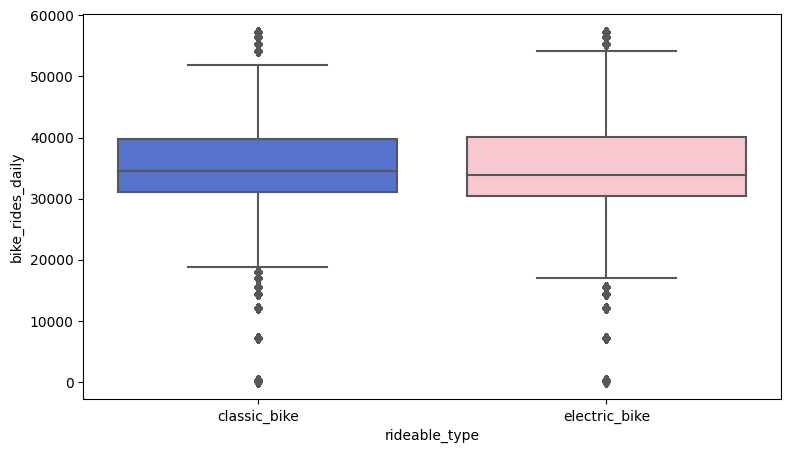

In [38]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'rideable_type', y = 'bike_rides_daily', data = df, palette = {'classic_bike': 'royalblue', 'electric_bike': 'pink'})
plt.show()

### Violin Plot 

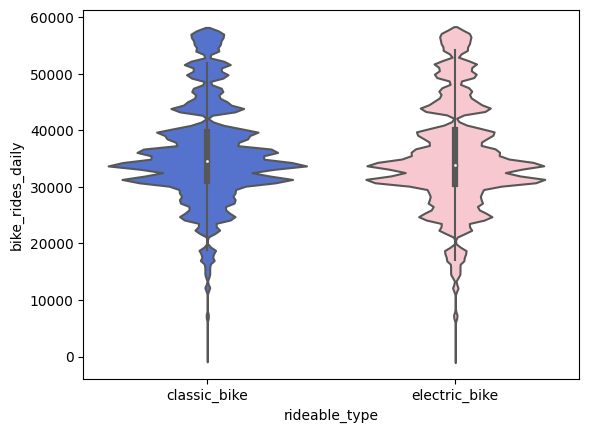

In [40]:
sns.violinplot(x = 'rideable_type', y = 'bike_rides_daily', data = df, palette = {'classic_bike': 'royalblue', 'electric_bike': 'pink'})
plt.show()

### Strip plot

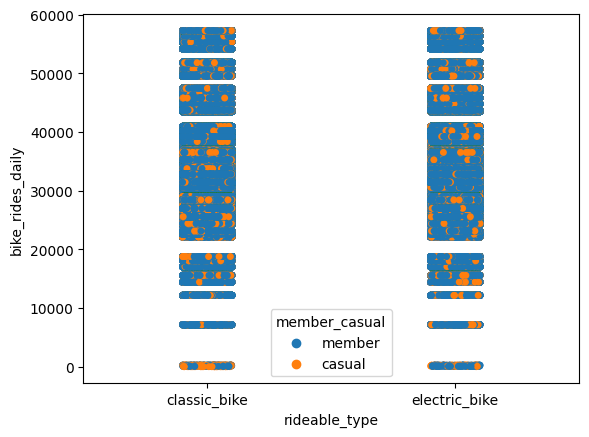

In [42]:
sns.stripplot(x = 'rideable_type', y = 'bike_rides_daily', data = df, hue = 'member_casual')
plt.show()

In [43]:
sns.reset_orig()

### FacetGrids

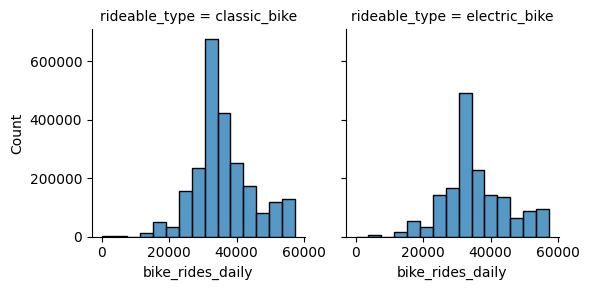

In [45]:
grid = sns.FacetGrid(df, col = "rideable_type")
grid.map(sns.histplot, "bike_rides_daily", bins = 15)
plt.show()

### By the help of this facetgrids, we are able to differenciate 2 categorical variable with its performance. Here, in this facetgrid, we can see clearly which type of bike (electic vs classic) is more prefered in daily bike rides by our users.

### Histogram

In [47]:
sns.set_style('darkgrid')

In [48]:
%matplotlib inline

<Figure size 900x500 with 0 Axes>

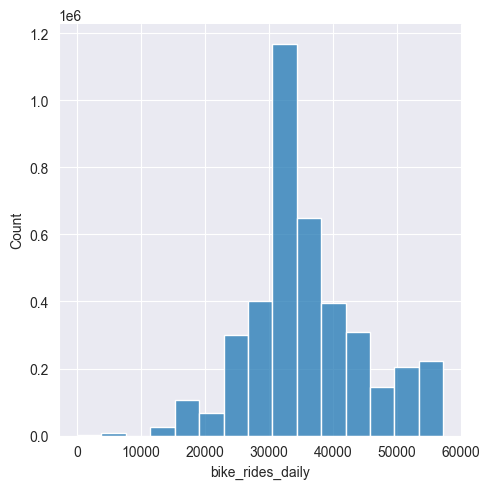

In [49]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [50]:
sns.reset_orig()

<Figure size 900x500 with 0 Axes>

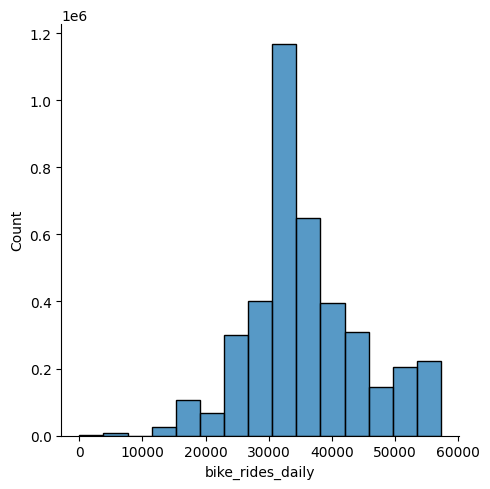

In [51]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [52]:
sns.set_style('whitegrid')

<Figure size 900x500 with 0 Axes>

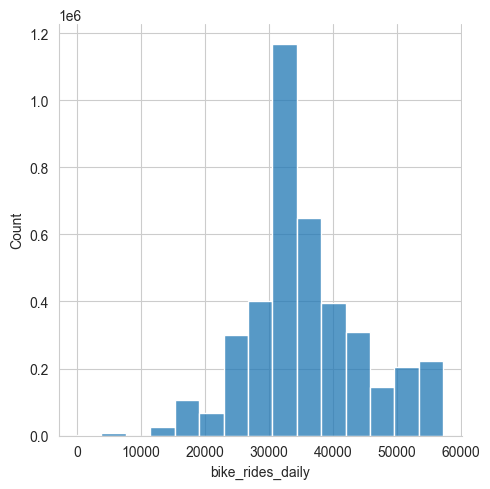

In [53]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [54]:
sns.set_style('dark')

<Figure size 900x500 with 0 Axes>

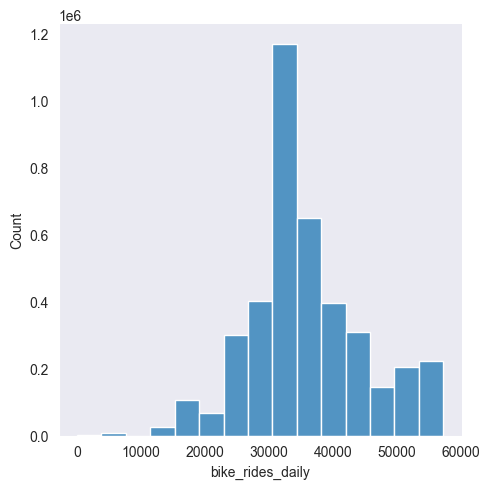

In [55]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [56]:
sns.set_style('white')

<Figure size 900x500 with 0 Axes>

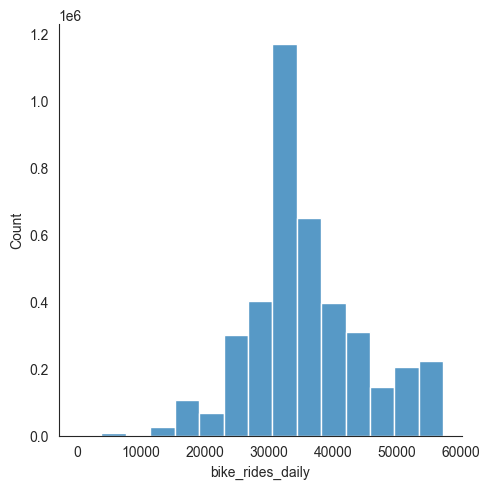

In [57]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [58]:
sns.set_style('ticks')

<Figure size 900x500 with 0 Axes>

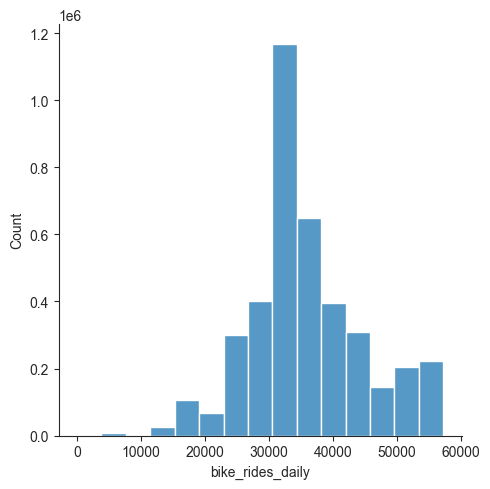

In [59]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [60]:
sns.set_theme()

<Figure size 900x500 with 0 Axes>

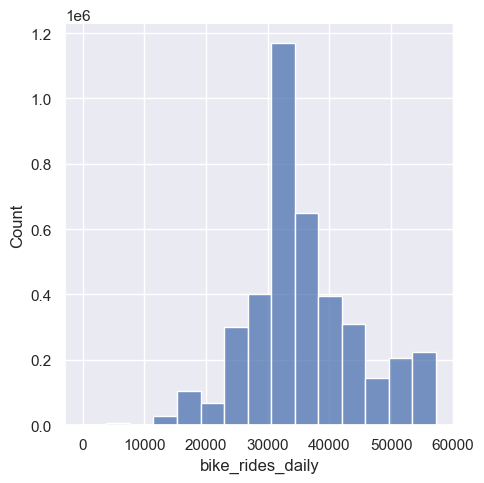

In [61]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [62]:
sns.set_theme(style="whitegrid", palette="Blues_r")

In [63]:
# Creating new column as trip_duration
# Ensure 'started_at' and 'ended_at' are in datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate trip duration in minutes
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Display the first few rows to verify
print(df[['ride_id', 'trip_duration']].head())


            ride_id  trip_duration
0  70F3BA79664016C1       6.089217
1  A17A13BC93E70054       3.789067
2  A40EA69F1AAAF8F1      20.976117
3  8181BFC7CD2D0D29       6.488017
4  9264124038B95E9A      22.009333


In [64]:
df['trip_duration'].head()

0     6.089217
1     3.789067
2    20.976117
3     6.488017
4    22.009333
Name: trip_duration, dtype: float64

### Palettes

In [66]:
sns.set_style("dark")
sns.set_palette('PuRd_r')

<Figure size 900x500 with 0 Axes>

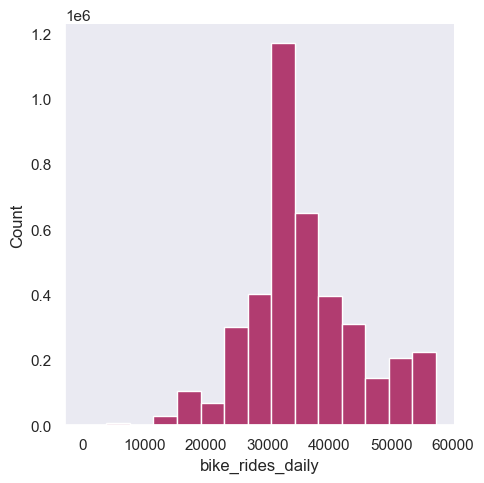

In [67]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

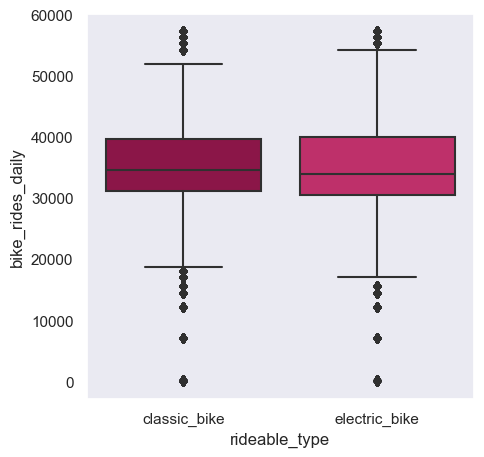

In [68]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'rideable_type', y = 'bike_rides_daily', data = df)
plt.show()

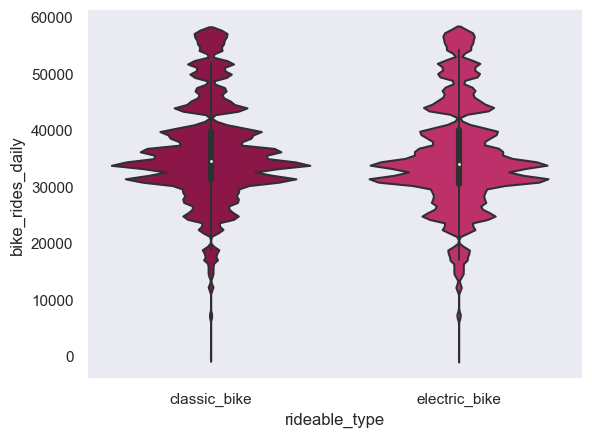

In [69]:
sns.violinplot(x = 'rideable_type', y = 'bike_rides_daily', data = df)
plt.show()

In [70]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag', 'trip_duration'],
      dtype='object')

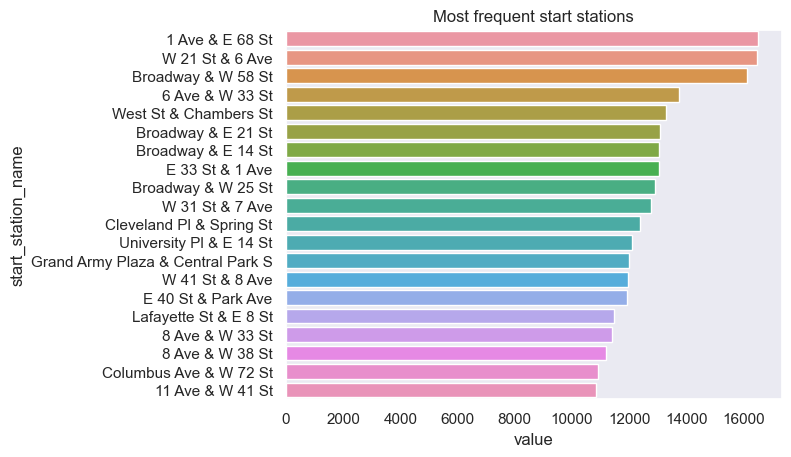

In [71]:
sns.set_palette('PuRd_r')
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

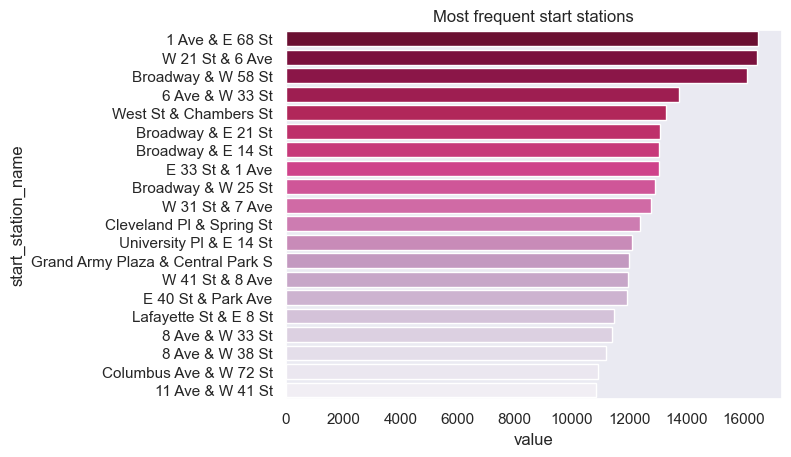

In [72]:
sns.set_palette('PuRd_r', n_colors = 20)
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

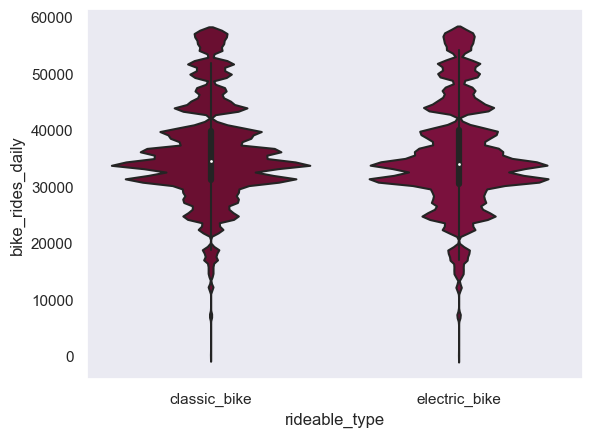

In [73]:
sns.violinplot(x = 'rideable_type', y = 'bike_rides_daily', data = df)
plt.show()

In [74]:
plt.figure(figsize = (10, 5))
with sns.color_palette('PuRd_r', n_colors = 20):
    sns.barplot(data = top20, x = 'value', y = 'start_station_name').set_title("Most frequent start stations")

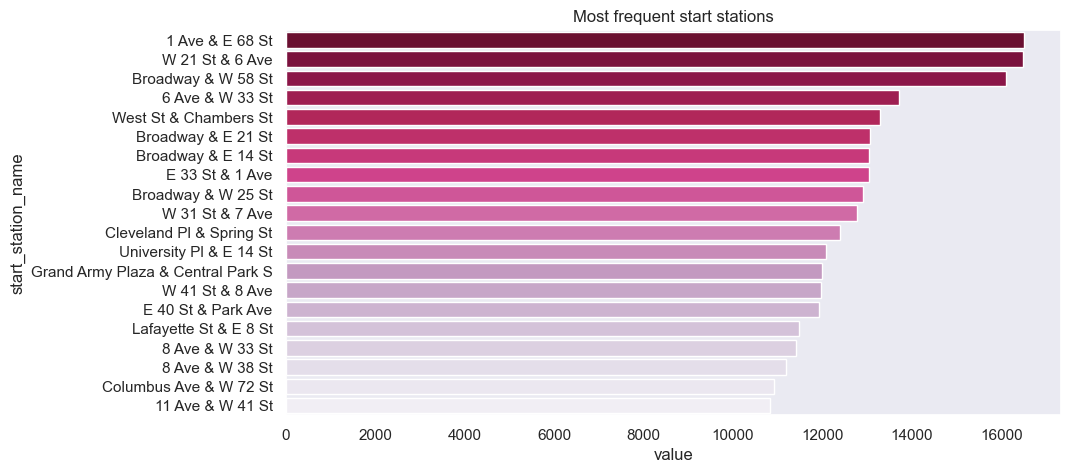

In [75]:
plt.show()

### Themes

In [77]:
# Ensure trip_duration is numerical
df['trip_duration'] = df['trip_duration'].astype(float)

In [78]:
df['trip_duration'].describe().apply(lambda x: format(x, 'f'))

count    4000000.000000
mean          17.137913
std          623.803725
min          -57.130933
25%            5.670200
50%            9.878933
75%           17.433567
max       779090.164883
Name: trip_duration, dtype: object

In [153]:
df_1 = df[df['trip_duration'] < 5000]

In [156]:
print(df.shape)
print(df_1.shape)

(4000000, 20)
(3999904, 20)


In [158]:
sns.set_theme(style = "white", palette = "bright")

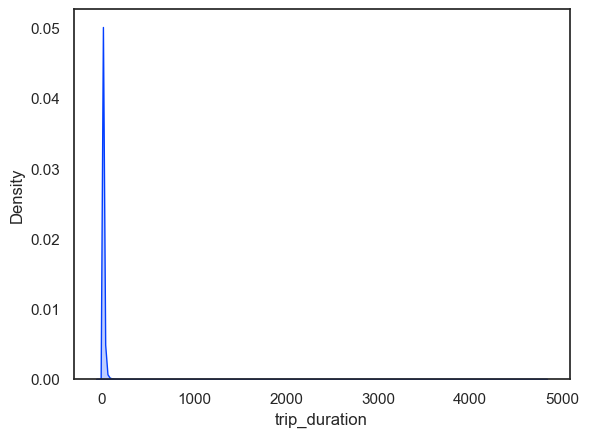

In [160]:
sns.kdeplot(df_1['trip_duration'], fill = True)
plt.show()

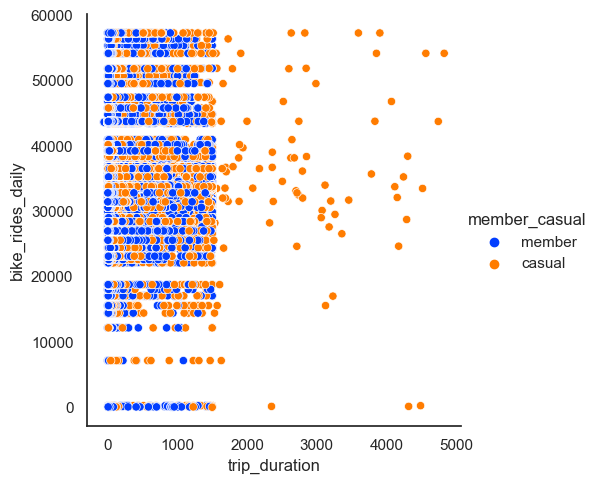

In [162]:
sns.relplot(data = df_1, x = 'trip_duration', y = 'bike_rides_daily', hue = 'member_casual')
plt.show()

In [164]:
df.to_csv('newyork_data.csv')